# 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w,b=1.8,2.5

In [3]:
np.random.seed(0)
x=np.random.rand(100)*4-2
noise=np.random.randn(100)/3
y=w*x+b+noise

In [4]:
x=x.reshape(-1,1)
x.shape,y.shape

((100, 1), (100,))

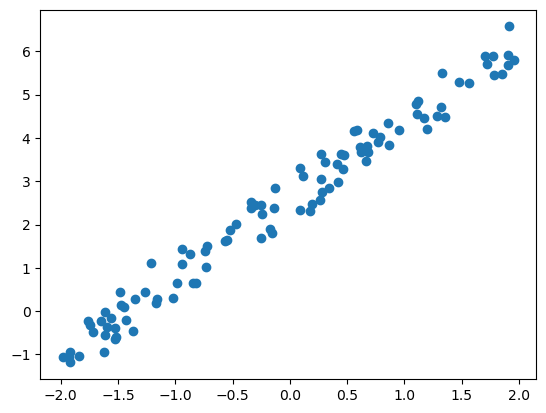

In [5]:
plt.scatter(x,y)
plt.show()

# sklearn中的神经网络

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
reg=MLPRegressor(
    hidden_layer_sizes=(1,),#sklearn神经网络默认含有一个带权重的输出层
    activation='identity',#不用激活函数
    learning_rate_init=0.01,#学习率
    random_state=233
)

In [8]:
reg.fit(x,y)

MLPRegressor(activation='identity', hidden_layer_sizes=(1,),
             learning_rate_init=0.01, random_state=233)

In [9]:
reg.score(x,y)

0.974674992013746

In [10]:
y_predict=reg.predict(x)

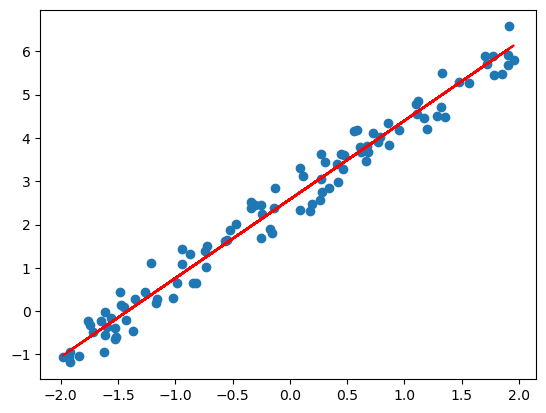

In [11]:
plt.scatter(x,y)
plt.plot(x,y_predict,c='r')
plt.show()

In [12]:
w1,w2=np.array(reg.coefs_).reshape(-1)
b1,b2=np.array(reg.intercepts_).reshape(-1)
print(w1,w2,b1,b2)

-2.0230772887975506 -0.8994147672147477 0.20843202333485145 2.7673419504355397


In [13]:
w1*w2,w2*b1+b2

(1.8195855887612917, 2.5798751106877256)

# 反向传播权重更新

In [14]:
w1,b1,w2,b2=np.random.randn(4)
w1,b1,w2,b2

(-0.35399391125348395,
 -1.3749512934180188,
 -0.6436184028328905,
 -2.2234031522244266)

In [15]:
y_real=y.reshape(-1,1)
ir=0.01

In [17]:
for i in range(100):
    y1=w1*x+b1
    y_predict=w2*y1+b2
    loss=((y_real-y_predict)**2)/2
    
    dy=y_predict-y_real
    dy1=dy*w2
    
    dw1=np.mean(x*dy1)
    dw2=np.mean(y1*dy)
    db1=np.mean(dy1)
    db2=np.mean(dy)
    
    w1-=ir*dw1
    w2-=ir*dw2
    b1-=ir*db1
    b2-=ir*db2
    
print(w1,b1,w2,b2)

-0.920048111160913 -2.129151142706114 -1.9506882720836392 -1.589763076793559


In [18]:
y_predict=w2*(w1*x+b1)+b2

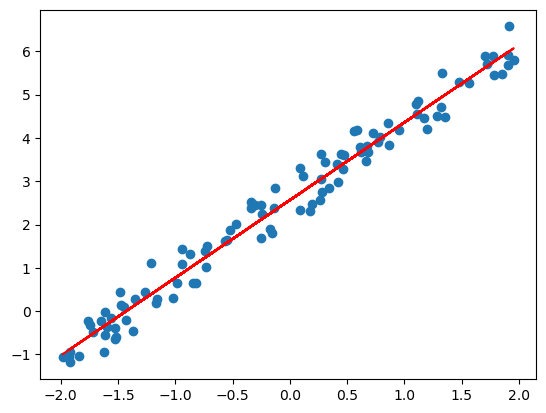

In [19]:
plt.scatter(x,y)
plt.plot(x,y_predict,c='r')
plt.show()

In [21]:
w1*w2,w2*b1+b2

(1.7947270601942973, 2.5635470867767363)